<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>

<p align="center">Curso:Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 203008067_14 </p>

 <p align="center"> Fase 3 - Componente práctico - Prácticas simuladas</p>

 <p align="center">  Presentado por: Andrés Felipe Ortiz Parra</p>

<p align="center"> Código: 203008067A_1702</p>

 <p align="center">  Tutor(a): Rafael Roberto Ruiz Escorcia </p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> 28 de julio de 2024</p>

## <div align="center"> **Acción 1: Aplicación modelo de Regresión logística,**

- a. Construir la variable ‘nivel_productividad’ con niveles alto y bajo. Considere nivel alto a productividad real > 0.7 y nivel bajo a productividad real <=0.7.
- b. Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).
- c. Con la base de entrenamiento aplicar un modelo de regresión logística para predecir el ‘nivel_productividad’ basado en el número de trabajadores de cada equipo y el tiempo extra en minutos.
- d. Calcular la matriz de confusión 
- e. Calcule la precisión (Accuracy) sobre los datos de prueba.
- f. Calcule el ratio de verdaderos positivos (Recall) sobre los datos de prueba.
- g. Calcule la especificidad (Specificity) sobre los datos de prueba.

In [225]:
'''a. Construir la variable ‘nivel_productividad’ con niveles alto y bajo. Considere nivel alto a productividad real > 0.7 
   y nivel bajo a productividad real <=0.7.'''

import pandas as pd   #Importamos la librería pandas.
import numpy as np

datos = pd.read_csv('Anexo 2 - Productividad confección.csv') #importamos los datos del archivo csv.
datos2 = pd.DataFrame(datos) #Asignamos los datos al Dataframe 1.

condiciones = [                          # Creamos la variable condiciones donde se asignan las condiciones a cumplir.
    (datos2['actual_productivity'] > 0.7),  # Se asignan los rangos para cada condición.
    (datos2['actual_productivity'] < 0.7)   # Se asignan los rangos para cada condición.
]
valores = ['alto', 'bajo']   # Se asignan los valores para cada condición.

datos2['nivel_productividad'] = np.select(condiciones, valores) #Creamos la nueva columna llamada ‘nivel_productividad’ y usamos la función select con las condiciones y valores.

In [226]:
# Cambiar de variable categórica a numérica
cat = pd.get_dummies(datos2['nivel_productividad'], prefix='Nivel')  #Aplicamos get_dummies a la variable categórica
cat = cat.drop(['Nivel_0', 'Nivel_alto'], axis=1) #Aplicamos drop para eliminar las variables categóricas duplicadas. 

In [227]:
# Eliminamos la variable ‘nivel_productividad’ del Dataframe inicial.
df_1 = datos2.drop(['nivel_productividad'], axis=1)

#Concatenamos el Dataframe inicial con el Dataframe con la variable numérica.
df1 = pd.concat([df_1, cat], axis=1)
df1.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Nivel_bajo
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,False
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,False
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,False
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,False
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,False


In [228]:
'''b. Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).'''

from sklearn.model_selection import train_test_split #Importmos la función train_test_spli para dividir un dataset en dos bloques (Training | Test)

x=df1[['no_of_workers','over_time']]  #Seleccionamos las características variable x (variables predictoras)
y=df1['Nivel_bajo']  #Seleccionamos las etiquetas variable y (variable predicha)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #Aplicación de la regla datos de prueba del 20% 

'''c. Con la base de entrenamiento aplicar un modelo de regresión logística para predecir el ‘nivel_productividad’ 
   basado en el número de trabajadores de cada equipo y el tiempo extra en minutos.'''

from sklearn.linear_model import LogisticRegression # Importamos para función del modelo de regresión logistica.

model_1 = LogisticRegression()  #Modelo de regresión lineal
model_1.fit(x_train, y_train)  #Asignamos los datos de entrenamiento al modelo de regresión logistica.

LogisticRegression()

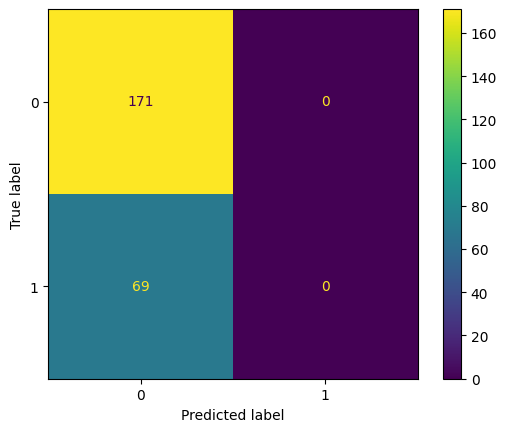

In [229]:
'''d. Calcular la matriz de confusión '''

from sklearn.metrics import confusion_matrix #Importamos la función matriz de confusión 
from sklearn.metrics import accuracy_score #Importamos la función precisión
from sklearn.metrics import recall_score #Importamos la función recall
from sklearn.metrics import ConfusionMatrixDisplay

#Calculamos la matriz de confusión.

predict_1 = model_1.predict(x_test) #Indicamos la variable x_test, que es el conjunto de datos reservados para las pruebas, los cuales estamos utilizando para predecir.
matriz_1 = confusion_matrix(y_test, predict_1) #Asignamos las variables Y_prueba y predicción para calcular la matriz de confusión

#Visualizar matriz de confusión.
vis_1 = ConfusionMatrixDisplay(matriz_1)
vis_1.plot()

In [230]:
'''e. Calcule la precisión (Accuracy) sobre los datos de prueba.'''

precision_1 = accuracy_score(y_test, predict_1) #Asignamos las variables Y prueba y predicción para calcular la precisión.

preci_porcent_1 = precision_1 * 100 # La precisión responde a la pregunta "¿Qué proporción de identificaciones positivas fue realmente correcta?

print(f'El porcentaje de precisión es: {preci_porcent_1:.2f} %') #Imprimimos el porcentaje de precisión

El porcentaje de precisión es: 71.25 %


In [231]:
'''f. Calcule el ratio de verdaderos positivos (Recall) sobre los datos de prueba.'''

recall_1 = recall_score(y_test,predict_1) #Asignamos las variables Y prueba y predicción para calcular la Sensibilidad.

recall_porcent_1 = recall_1 *100  #La sensibilidad responde a la pregunta "¿Qué proporción de positivos reales se identificó correctamente?"

print(f'El porcentaje de sensibilidad es: {recall_porcent_1:.2f} %') #Imprimimos el porcentaje de recall


El porcentaje de sensibilidad es: 0.00 %


In [232]:
'''g. Calcule la especificidad (Specificity) sobre los datos de prueba.''' 

specificity_1 = matriz_1[0,0]/(matriz_1[0,0]+matriz_1[0,1]) #Asignamos las variables para calcular la Especificidad.

specificity_porcent_1 = specificity_1 *100  # Mide la proporción de negativos reales que se identifican correctamente como tales

print(f'El porcentaje de especificidad es: {specificity_porcent_1:.2f} %') #Imprimimos el porcentaje de Especificidad

El porcentaje de especificidad es: 100.00 %


## <div align="center"> **Acción 2: Aplicación modelo K-NN.**

- a. Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.
- b. Calcular la matriz de confusión 
- c. Calcule la precisión (Accuracy) sobre los datos de prueba.
- d. Calcule el ratio de verdaderos positivos (Recall) sobre los datos de prueba.
- e. Calcule la especificidad (Specificity) sobre los datos de prueba.

In [233]:
'''a. Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores 
   de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.'''

from sklearn.model_selection import train_test_split #Importmos la función train_test_spli para dividir un Dataset en dos bloques (Training | Test) 

x=df1[['no_of_workers','over_time']]  #Seleccionamos las características variable x (variables predictoras)
y=df1['Nivel_bajo']  #Seleccionamos las etiquetas variable y (variable predicha)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #Aplicación de la regla datos de prueba del 20% 

from sklearn.neighbors import KNeighborsClassifier # Importamos para función del modelo KNN

model_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #Indicamos que K o el número de vecinos será 5, la combinación de estos dos elementos le indica al algoritmo que utilizará la distancia euclidiana para verificar la distancia entre los vecinos.
model_2.fit(x_train, y_train) #Asignamos los datos de entrenamiento al modelo KNN

KNeighborsClassifier()

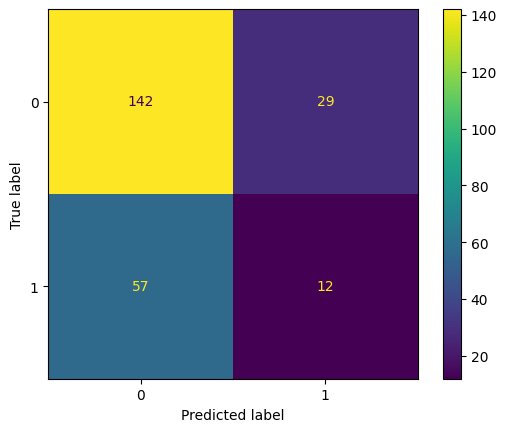

In [234]:
'''b. Calcular la matriz de confusión '''

from sklearn.metrics import confusion_matrix #Importamos la función matriz de confusión 
from sklearn.metrics import accuracy_score #Importamos la función Precisión
from sklearn.metrics import recall_score #Importamos la función recall
from sklearn.metrics import ConfusionMatrixDisplay

#Calculamos la matriz de confusión.
predict_2 = model_2.predict(x_test) #Indicamos la variable x_test, que es el conjunto de datos reservados para las pruebas, los cuales estamos utilizando para predecir.
matriz_2 = confusion_matrix(y_test, predict_2) #Asignamos las variables Y prueba y predicción para calcular la matriz de confusión

#Visualizar matriz de confusión.
vis_2 = ConfusionMatrixDisplay(matriz_2)
vis_2.plot()

In [235]:
'''c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.'''

precision_2 = accuracy_score(y_test, predict_2) #Asignamos las variables Y prueba y predicción para calcular la precisión.

preci_porcent_2 = precision_2 * 100 #La precisión responde a la pregunta "¿Qué proporción de identificaciones positivas fue realmente correcta?

print(f'El porcentaje de precisión es: {preci_porcent_2:.2f} %')  #Imprimimos el porcentaje de precisión

El porcentaje de precisión es: 64.17 %


In [236]:
'''d. Calcule el ratio de verdaderos positivos (Recall) sobre los datos de prueba.'''

recall_2 = recall_score(y_test,predict_2) #Asignamos las variables Y prueba y predicción para calcular la Sensibilidad.

recall_porcent_2 = recall_2 *100 #La sensibilidad responde a la pregunta "¿Qué proporción de positivos reales se identificó correctamente?"

print(f'El porcentaje de sensibilidad es: {recall_porcent_2:.2f} %') #Imprimimos el porcentaje de recall

El porcentaje de sensibilidad es: 17.39 %


In [237]:
'''e. Calcule la especificidad (Specificity) sobre los datos de prueba.'''

specificity_2 = matriz_2[0,0]/(matriz_2[0,0]+matriz_2[0,1]) #Asignamos las variables para calcular la Especificidad.

specificity_porcent_2 = specificity_2 *100  #Mide la proporción de negativos reales que se identifican correctamente como tales

print(f'El porcentaje de especificidad es: {specificity_porcent_2:.2f} %') #Imprimimos el porcentaje de Especificidad

El porcentaje de especificidad es: 83.04 %


## <div align="center"> **Acción 3: Aplicación modelo Árboles de decisión (CART)**

- a. Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” bajo y alto usando todas las características.
- b. Usando la función graphviz() visualizar el diagrama de árbol.
- c. Calcular la matriz de confusión 
- d. Calcule la precisión (Accuracy) sobre los datos de prueba.
- e. Calcule el ratio de verdaderos positivos (Recall) sobre los datos de prueba.
- f. Calcule la especificidad (Specificity) sobre los datos de prueba.

In [238]:
'''a. Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” 
   bajo y alto usando todas las características.'''

#corregir la variable wip
df1['wip'] = df1['wip'].fillna(0) #Reemplazamos los datos NaN con ceros

# Seleccionar las variables independientes y la variable objetivo
x = df1.drop(columns=['actual_productivity','date', 'Nivel_bajo'])
x = pd.get_dummies(x)

y=df1['Nivel_bajo']  #Seleccionamos las etiquetas variable y (variable predicha)

# Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #Aplicación de la regla datos de prueba del 20% 

In [239]:
# Entrenar un modelo de árbol de decisión usando todas las variables del dataset
from sklearn.tree import DecisionTreeClassifier # Importamos para función del modelo árboles de decisión.
model_3 = DecisionTreeClassifier(max_depth=4)
model_3.fit(x_train, y_train) #Asignamos los datos de entrenamiento al modelo árbol de decisión

DecisionTreeClassifier(max_depth=4)

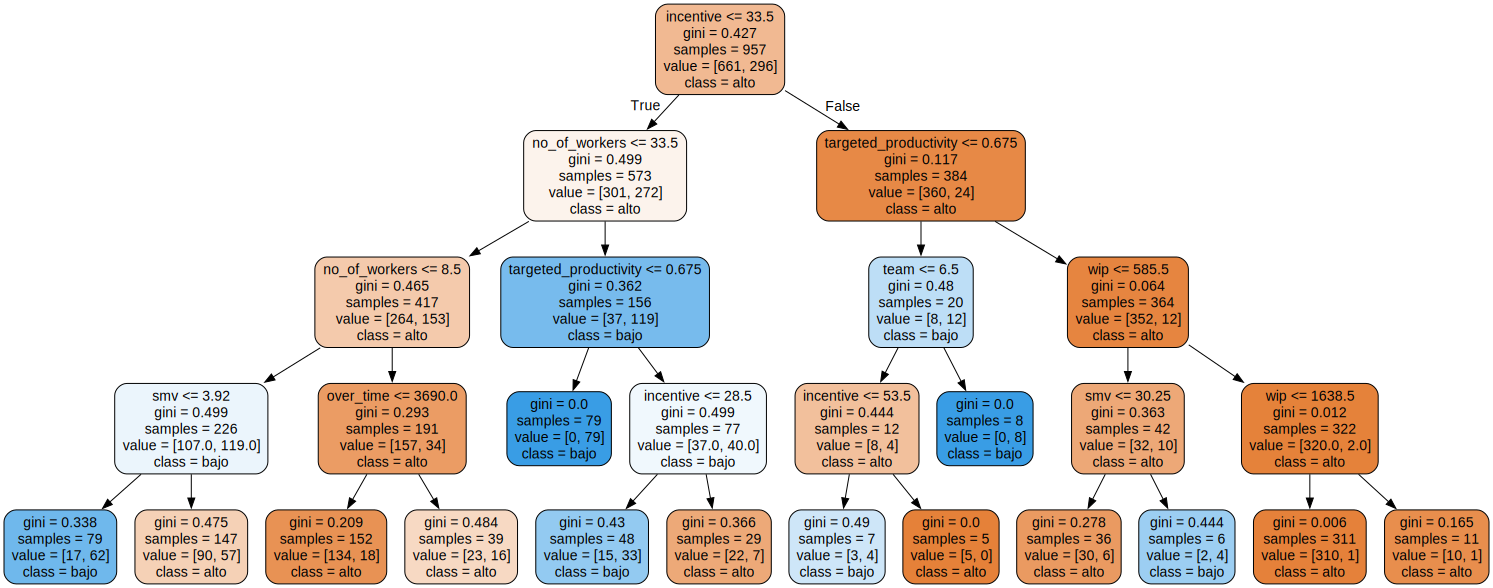

In [240]:
'''b. Usando la función graphviz() visualizar el diagrama de árbol.'''
from sklearn import tree #Importamos la función árbol de decisión 
import graphviz #Importamos la función graphviz

dot_data = tree.export_graphviz(model_3, out_file=None, feature_names=x_train.columns,class_names=['alto','bajo'], filled=True, rounded=True) #Asignamos el modelo de árbol de decisión, y los parámetros con la función graphviz
graph = graphviz.Source(dot_data) #Grafica los datos asignados a la variable dot_data

graph #Visualiza la gráfica

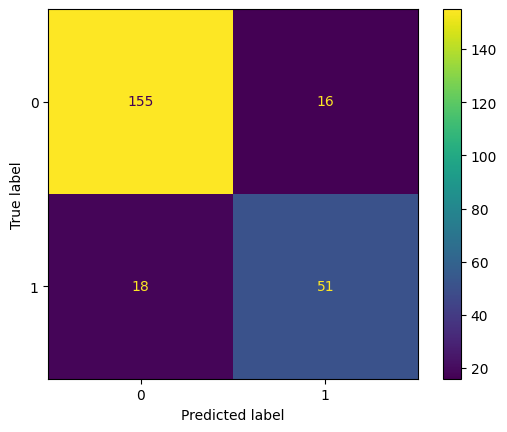

In [241]:
'''c. Calcular la matriz de confusión '''

from sklearn.metrics import confusion_matrix #Importamos la función matriz de confusión 
from sklearn.metrics import accuracy_score #Importamos la función precisión
from sklearn.metrics import recall_score #Importamos la función recall
from sklearn.metrics import ConfusionMatrixDisplay 

#Calculamos la matriz de confusión.
predict_3 = model_3.predict(x_test) #Indicamos la variable x_test, que es el conjunto de datos reservados para las pruebas, los cuales estamos utilizando para predecir.
matriz_3 = confusion_matrix(y_test, predict_3)  #Asignamos las variables Y prueba y predicción para calcular la matriz de confusión

#Visualizar matriz de confusión.
vis_3 = ConfusionMatrixDisplay(matriz_3)
vis_3.plot()

In [242]:
'''d. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.'''

precision_3 = accuracy_score(y_test, predict_3)  #Asignamos las variables Y prueba y predicción para calcular la precisión.

preci_porcent_3 = precision_3 * 100  #La precisión responde a la pregunta "¿Qué proporción de identificaciones positivas fue realmente correcta?

print(f'El porcentaje de precisión es: {preci_porcent_3:.2f} %') #Imprimimos el porcentaje de precisión 

El porcentaje de precisión es: 85.83 %


In [243]:
'''e. Calcule el ratio de verdaderos positivos (Recall) sobre los datos de prueba.'''

recall_3 = recall_score(y_test,predict_3) #Asignamos las variables Y prueba y predicción para calcular la Sensibilidad.

recall_porcent_3 = recall_3 *100  #La sensibilidad responde a la pregunta "¿Qué proporción de positivos reales se identificó correctamente?"

print(f'El porcentaje de sensibilidad es: {recall_porcent_3:.2f} %') #Imprimimos el porcentaje de recall

El porcentaje de sensibilidad es: 73.91 %


In [244]:
'''f. Calcule la especificidad (Specificity) sobre los datos de prueba.'''

specificity_3 = matriz_3[0,0]/(matriz_3[0,0]+matriz_3[0,1]) #Asignamos las variables para calcular la Especificidad.

specificity_porcent_3 = specificity_3 *100  #Mide la proporción de negativos reales que se identifican correctamente como tales

print(f'El porcentaje de especificidad es: {specificity_porcent_3:.2f} %') #Imprimimos el porcentaje de Especificidad

El porcentaje de especificidad es: 90.64 %


## <div align="center"> **Acción 4: Conclusiones.**

### **Resultados obtenidos con la aplicación de los modelos**

| **Métrica** | **Regresión Logística** |   **K-NN**   | **Árbol de Decisión** |
|-------------|-------------------------|--------------|-----------------------|
| Accuracy    |     71.25%              |    64.17%    |      85.83%           |
| Recall      |         0%              |    17.39%    |      73.91%           |
| Specificity |       100%              |    83.04%    |      90.64%           |


### **Métrica Accuracy**

#### Nos indica la precisión de la clasificación, indica la proporción de predicciones correctas (tanto verdaderos positivos como verdaderos negativos), sobre el total de las predicciones realizadas. Podemos observar que el **Árbol de Decisión** es el modelo de aprendizaje automático que tiene el mayor porcentaje de precisión con un **85.83%**, seguido de la **Regresión Logística** con un **71.25%** y el modelo que tiene la menor precisión es el **K-NN** con un **64.17%**


### **Métrica Recall**

#### El Recall o sensibilidad mide la proporción de verdaderos positivos correctamente identificados entre todos los casos que son realmente positivos. Podemos observar que el **Árbol de Decisión** es el modelo de aprendizaje automático que tiene el mayor porcentaje de Recall mas alto con porcentaje de **73.91%**, lo que indica que este modelo identifica correctamente una mayor proporción de verdaderos positivos. Lo sigue el modelo **K-NN** con porcentaje de Recall de **17.39%** esto indica que no hace un buen trabajo al momento de identificar correctamente los verdaderos positivos, y finalmente el modelo de **Regresión Logística** tiene un porcentaje de Recall de **0%**, lo cual es muy bajo indicando que este modelo no está detectando ningún caso positivo correctamente.

### **Métrica Specificity**

#### La Specificity o especificidad nos muestra la proporción de verdaderos negativos correctamente identificados, entre todos los casos que son realmente negativos. Podemos observar que el modelo de **Regresión Logística** es el que tiene la especificidad más alta con un porcentaje de **100%**, esto indica que identifica correctamente todos los casos negativos. Lo sigue el modelo de **Árbol de Decisión** con un alto porcentaje de especificidad de **90.64%** y finalmente el modelo de **K-NN** con un porcentaje de especificidad de **83.04%**; pese a que estos dos últimos modelos tienen altos valores de especificidad, no tan altos como la **Regresión Logística**.


#### Después de analizar los resultados obtenidos en las métricas de cada uno de los modelos de aprendizaje automático aplicado al Dataset, podemos decir que, en términos de la **precisión**, el **Árbol de decisión** es el mejor modelo, igualmente se observa que tiene un buen balance entre **Recall** y **Specificity**, esto indica que es un modelo bastante bueno para detectar los casos que son realmente positivos como negativos. Por lo tanto, basándonos en los resultados de las métricas, el Árbol de Decisión es el modelo más efectivo realizando una tarea de clasificación, es decir predicción de categorías para este conjunto de datos.

## <div align="center"> **Referencias**

##### Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt Publishing.
##### Kyriakides, G., & G. Margaritis, K. (2019). Hands-On Ensemble Learning with Python. Packt Publishing.
##### Raschka, S., & Mirjalili, V. (2017). Python Machine Learning Second Edition. Packt Publishing.
##### Lee, A. (2023). Comprensión de la Matriz de Confusión y Cómo Implementarla en Python. Obtenido de https://www.datasource.ai/es/data-science-articles/comprension-de-la-matriz-de-confusion-y-como-implementarla-en-python
##### graphviz. (2024). graphviz.org. Obtenido de https://graphviz.org/documentation/
##### scikit-learn. (2007). scikit-learn.org. Obtenido de scikit-learn.org: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
##### scikit-learn. (2007). scikit-learn.org. Obtenido de https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression
##### scikit-learn. (2007). scikit-learn.org. Obtenido de https://scikit-learn.org/stable/modules/model_evaluation.html